In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Please upload the file titanic_train.csv to your environment
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Sample 30 passengers from 3rd class
c3_sample = data[data['Pclass']==3]['Fare'].sample(30)
c3_sample

140    15.2458
419    24.1500
469    19.2583
18     18.0000
459     7.7500
103     8.6542
623     7.8542
788    20.5750
289     7.7500
51      7.8000
479    12.2875
146     7.7958
649     7.5500
59     46.9000
279    20.2500
276     7.7500
855     9.3500
703     7.7417
840     7.9250
574     8.0500
7      21.0750
480    46.9000
739     7.8958
94      7.2500
348    15.9000
638    39.6875
654     6.7500
260     7.7500
497    15.1000
57      7.2292
Name: Fare, dtype: float64

In [ ]:
#compute sample mean and sample std
mean = c3_sample.mean()
std = c3_sample.std(ddof=1)
display(mean)
display(std)

14.939166666666667

11.359322838739669

In [ ]:
#compute the test statistics
stat = (mean-17)/(std/np.sqrt(30))
stat

-0.9936903105488879

In [ ]:
# p-value 2-tailed
display(st.t.sf(abs(stat),30-1)*2)
# p-value 1-tailed
display(st.t.sf(abs(stat),30-1))
#notice any pattern? why?

0.328593081051046

0.164296540525523

In [ ]:
# let's compare decisions in the class. Maybe we need to change sample size?

In [ ]:
#now for all neatly packed...
st.ttest_1samp(c3_sample,17)

Ttest_1sampResult(statistic=-0.9936903105488888, pvalue=0.32859308105104557)

In [ ]:
#...and for a single tailed experiment
st.ttest_1samp(c3_sample,17,alternative='less')

TypeError: ignored

In [ ]:
#do it yourself
#check if 1st class prices are different from 85 usd by sampling 30 1st class passengers and requiring a 5% significance.

In [ ]:
#H0: \mu_1 = 85, H1 \mu_1 != 85

In [ ]:
#answer
c1_sample = data[data['Pclass']==1]['Fare'].sample(30)
st.ttest_1samp(c1_sample,85)

Ttest_1sampResult(statistic=-0.31011186692247994, pvalue=0.7586935715938985)

In [ ]:
#Example: Matched Pair.
#The data in the two samples is dependent. In the data we are studying the blood pressure before and after the treatment.

In [ ]:
blood_pressure = pd.read_csv('blood_pressure.csv')
blood_pressure.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [ ]:
st.ttest_rel(blood_pressure['after'], blood_pressure['before'])

Ttest_relResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

In [ ]:
# Before - After > 0    <=>  Before > After

In [ ]:
#Independent Samples
#For two groups where we cannot match the observations to one another. In this case transactions from a website with different interfaces (a, b)

In [ ]:
ab_test = pd.read_csv('ab_test.csv')
ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [ ]:
st.ttest_ind(ab_test['a'], ab_test['b'], equal_var=False) # if we don't assume equal variance the test will be more robust

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)

In [ ]:
#A-B<0    <=>   A<B

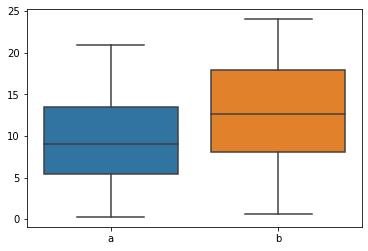

In [ ]:
sns.boxplot(data = ab_test)

In [ ]:
#ANOVA test
#to compare the means of multiple groups at the same time
#why not just multiple t-tests?

In [ ]:
interest_r = pd.read_csv('rate_by_city.csv')
interest_r.sample(7)

,Rate,City
22,13.5,3
5,13.0,1
3,13.5,1
39,13.9,5
21,13.5,3
19,14.0,3
12,12.5,2


In [ ]:
interest_r['city_count'] = interest_r.groupby('City').cumcount() ##is the new index 

interest_r_pivot = interest_r.pivot(index='city_count', columns='City', values='Rate')
interest_r_pivot.columns = ['City_'+str(x) for x in interest_r_pivot.columns.values]
interest_r_pivot.head()

,City_1,City_2,City_3,City_4,City_5,City_6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00


In [ ]:
st.f_oneway(interest_r_pivot['City_1'],interest_r_pivot['City_2'],interest_r_pivot['City_3'],interest_r_pivot['City_4'],interest_r_pivot['City_5'],interest_r_pivot['City_6'])

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)